# Data Exploration

In [1]:
# IMPORTS

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import gc
import seaborn as sns

## Load Data

In [2]:
%%time

df = pd.read_csv('data/train.csv')

Wall time: 1min 20s


In [3]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [4]:
print('Max difference in timestamp: ', df.timestamp.diff().max())
print('Max user number:',df['user_id'].max())
print()
print('Number of unique row ids: ', df['row_id'].nunique())
print('Number of unique content ids (questions/lectures): ', df['content_id'].nunique())
print('Number of unique task container ids: ', df['task_container_id'].nunique())
print('Number of unique answers: ', df['user_answer'].nunique())
print('Number of unique content type: ', df['content_type_id'].nunique())
print('Number of unique answered correctly: ', df['answered_correctly'].nunique())
print('Number of unique prev had expl (Odd, seems to only be Nan and False): ', df['prior_question_had_explanation'].nunique())

Max difference in timestamp:  83884261286.0
Max user number: 2147482888

Number of unique row ids:  101230332
Number of unique content ids (questions/lectures):  13782
Number of unique task container ids:  10000
Number of unique answers:  5
Number of unique content type:  2
Number of unique answered correctly:  3
Number of unique prev had expl (Odd, seems to only be Nan and False):  2


In [5]:
# print('Size of the dataset', sys.getsizeof(df) / 1000000000, 'GB')
# 10.88GB

# Data Visualization

In [6]:
colors = ['#00FFE2', '#00FDFF', '#00BCFF', '#0082FF', '#8000FF', '#B300FF', '#F400FF']

def dist_plot(df, feature, title, color=colors[4], categorical=True):
    
    if categorical:
        values = df[feature].value_counts().values
    else:
        values = df[feature].values
        
    print(f'{feature} information:')
    print(f'Mean: {np.mean(values)}')
    print(f'Median: {np.median(values)}')
    print(f'Max: {np.max(values)}\n')
    
    plt.figure(figsize = (18, 4))
    
    if categorical:
        sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})
    else:
        # To speed up the process
        sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})
    
    plt.title(title, fontsize=15)
    plt.show();
    
    del values
    gc.collect()

In [7]:
def barplot_features(df, feature, title, palette=colors[2:]):
    '''Takes the numerical columns (with less than 10 categories) and plots the barplot.'''
    
    # We need to extract both the name of the category and the no. of appearences
    index = df[feature].value_counts().reset_index()["index"].values
    values = df[feature].value_counts().reset_index()[feature].values

    plt.figure(figsize = (18, 4))
    sns.barplot(x = index, y = values, palette = colors[2:])
    plt.title(title, fontsize=15)
    plt.show();
    
    del index, values
    gc.collect()
    

In [8]:
print('Unique Users:',df['user_id'].nunique())
print('Unique content type:',df['content_type_id'].nunique())

Unique Users: 393656
Unique content type: 2


## Categorical Features

user_id information:
Mean: 257.1542971528441
Median: 41.0
Max: 17917

content_id information:
Mean: 7345.111885067479
Median: 4728.5
Max: 213605

task_container_id information:
Mean: 10123.0332
Median: 1318.0
Max: 804285



c:\users\tyler\desktop\school\fall 2020\datascience\project\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\tyler\desktop\school\fall 2020\datascience\project\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\tyler\desktop\school\fall 2020\datascience\project\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

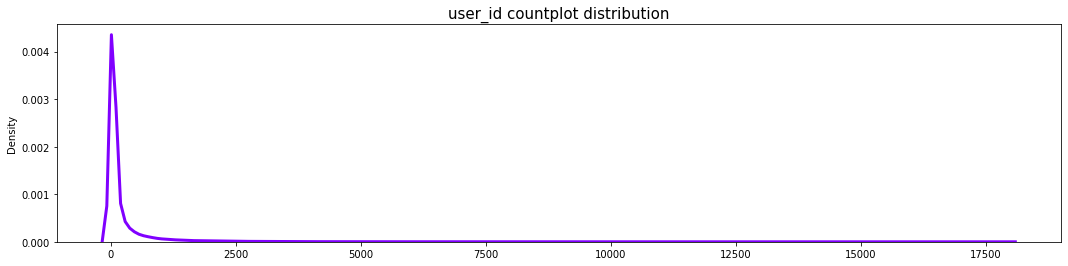

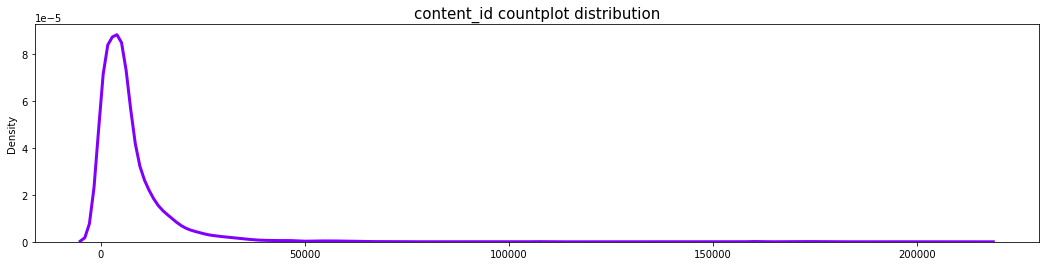

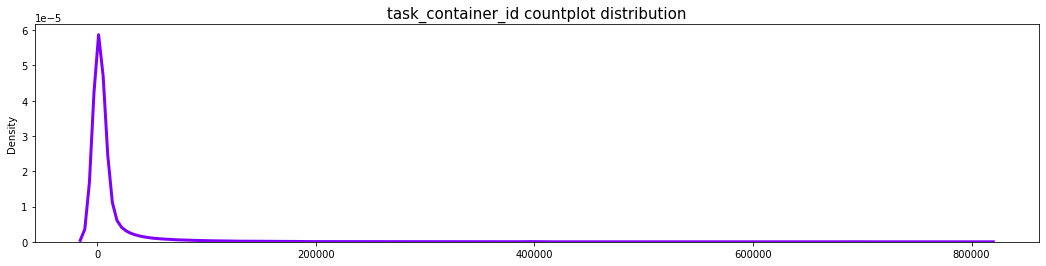

In [9]:
categorical_features = ['user_id', 'content_id', 'task_container_id']

for feature in categorical_features:
    dist_plot(df, feature=feature, title = feature + " countplot distribution", color=colors[4], categorical=True)

## Numerical Features

timestamp information:
Mean: 7703643654.326523
Median: 2674233764.5
Max: 87425772049

prior_question_elapsed_time information:
Mean: nan
Median: nan
Max: nan



c:\users\tyler\desktop\school\fall 2020\datascience\project\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\tyler\desktop\school\fall 2020\datascience\project\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


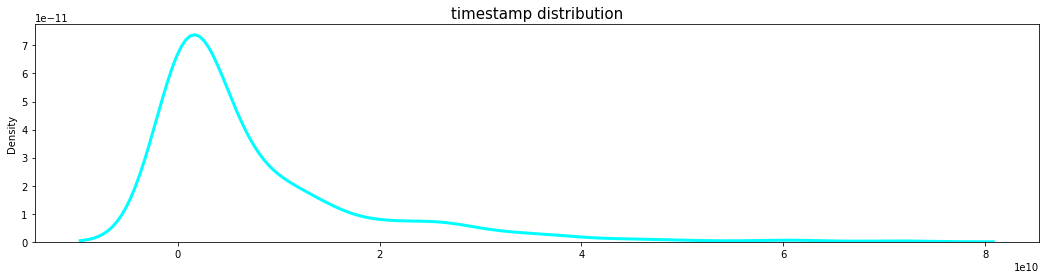

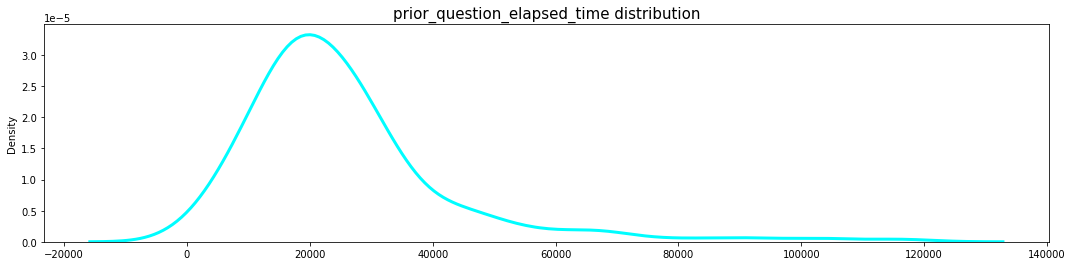

In [10]:
numerical_features = ['timestamp', 'prior_question_elapsed_time']

for feature in numerical_features:
    dist_plot(df, feature=feature, title = feature + " distribution", color =colors[1], categorical=False)

## Count the interactions from most users
Determine if a sequential model could be used

In [11]:
thresh = 30

counts = df['user_id'].value_counts().to_frame()

print(f'Number of users with number of interactions over {thresh} : {counts[counts["user_id"] >= thresh].count()[0]}')
print(f'Number of users with number of interactions below {thresh} : {counts[counts["user_id"] < thresh].count()[0]}')

Number of users with number of interactions over 30 : 298472
Number of users with number of interactions below 30 : 95184


Look at documentation for Saint+, looks promising for this project

In [3]:
df_q = pd.read_csv('data/questions.csv')
df_q.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [4]:
tags = df_q.tags.str.split(expand=True)
tags.fillna(value=np.nan, inplace=True)
tags = np.nan_to_num(tags.to_numpy().flatten(), nan=0).astype('float32')
tags_df = pd.DataFrame(tags)
tags_df.head()

print('Number of unique question tags:', tags_df[0].nunique())

Number of unique question tags: 188


In [5]:
print('Max bundle ids: ', df_q['bundle_id'].max())
print('Number of unique bundle ids: ', df_q['bundle_id'].nunique())
print('Number of unique question ids: ', df_q['question_id'].nunique())
print('Number of unique parts: ', df_q['part'].nunique())
print('Number of unique parts: ', df_q['correct_answer'].nunique())

Max bundle ids:  13522
Number of unique bundle ids:  9765
Number of unique question ids:  13523
Number of unique parts:  7
Number of unique parts:  4


# How to best format for network
I think the best option is to use a dictionary containing all of the users linked to a list, in order, of all the
questions that they have answered before. This list would contain all of the features we are looking at for each 
question.

Dict = { sequence }

sequence = [ [feature 1], [feature2] ... ], [ ans1, ans2, ...]

feature1 = [<br>
content type: one hot <br>
task container: binary encode<br>
user answer:one hot<br>
prior had expl: one hot<br>
prior time: numerical normalize<br>
correct ans? : one hot<br>
bundle id: binary encode<br>
type of: one hot<br>
part: one hot<br>
tags: binary encode<br>
]

The sequence is fed into the lstm, then the use id is embedded and concatenated with the output of the lstm before it
goes into the dense layer.

